<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/c_spatio_temporal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing - Spatio Temporal Data
## Spatio Temporal Data
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

Sources:
1. [Dataset Link](https://www.kaggle.com/datasets/thedevastator/the-relationship-between-crop-production-and-cli)
2. ChatGPT-4

### Setup
This section should be ran before anything else runs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!pip install pandas_profiling[notebook]

In [3]:
!pip install --use-deprecated=legacy-resolver pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.0

In [4]:
!pip install --use-deprecated=legacy-resolver matplotlib

In [5]:
!pip install --use-deprecated=legacy-resolver sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 68.3 MB/s eta 0:00:00


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/c_spatio_temporal/crop_production.csv'

### Spatio Temporal
A spatio-temporal dataset is a set of data that includes both spatial and temporal information, capturing the change in phenomena across both space and time.

1. **Spatial Information:** This refers to the geographical component of the data. It tells you "where" something occurs and usually includes information about the location, such as coordinates (latitude, longitude), distance, or area. For example, the location of different weather stations, the boundaries of urban areas, or the route of migrating animals.

2. **Temporal Information**: This component tells you "when" something occurs. It could be a specific timestamp (date and time), a recurring time interval (every Tuesday, monthly, yearly), or a duration (from start time to end time). For instance, it could be the daily rainfall measurements, the times when certain animals are spotted in specific locations, or the dates and times of traffic incidents.

By combining these two types of information, spatio-temporal datasets allow for complex analyses and forecasting that consider how conditions in a certain area change over time. These datasets are particularly important in fields like:

* Meteorology: For tracking weather patterns, climate change, and natural disasters.
* Epidemiology: For tracking the spread of diseases over time and across regions.
* Urban Planning: For monitoring changes in land use, traffic patterns, or population density.
* Environmental Science: For studying changes in ecosystems, migration patterns, or water quality.
* Transportation and Logistics: For managing fleet movements, traffic congestion, or supply chain networks.

The analysis of spatio-temporal data often requires specialized statistical methods and visualization tools because the data's structure can be more complex compared to traditional datasets that focus on either time series or spatial data alone.

### Step 1: Load and Preliminary Examination of Data

First, we need to load the dataset and see the initial few rows and basic statistics to understand what kind of data we are dealing with. This step is crucial to get a sense of the data structure, missing values, and potential features.

In [7]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Display basic statistical details
print(data.describe())


   index LOCATION  INDICATOR SUBJECT   MEASURE FREQUENCY  TIME     Value  \
0      0      AUS  CROPYIELD    RICE  TONNE_HA         A  1990  8.314607   
1      1      AUS  CROPYIELD    RICE  TONNE_HA         A  1991  8.394737   
2      2      AUS  CROPYIELD    RICE  TONNE_HA         A  1992  8.094340   
3      3      AUS  CROPYIELD    RICE  TONNE_HA         A  1993  8.336000   
4      4      AUS  CROPYIELD    RICE  TONNE_HA         A  1994  8.537815   

   Flag Codes  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
              index          TIME         Value  Flag Codes
count  20566.000000  20566.000000  2.056600e+04         0.0
mean   10282.500000   2007.591170  1.249281e+04         NaN
std     5937.037154     10.369489  5.960529e+04         NaN
min        0.000000   1970.000000  0.000000e+00         NaN
25%     5141.250000   1999.000000  1.961877e+00         NaN
50%    10282.500000   2008.000000  2.560970e+01         NaN
75%    15423.750000   2017.

### Step 2: Exploratory Data Analysis (EDA) with AutoEDA
For automated EDA, we can use tools like Pandas Profiling or Sweetviz that provide extensive and beautifully formatted insights into the data.

In [8]:
!pip uninstall scipy
!pip install scipy==1.10.1

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [9]:
import sweetviz as sv

# Analyzing the dataset. This function creates a Sweetviz report.
def analyze_data(df):
    # Creating a Sweetviz report.
    report = sv.analyze(df)

    # Saving the report to your local system.
    # This will generate a report named 'sweetviz_report.html' in your notebook's current directory.
    report.show_html('sweetviz_report.html')

# You can call this function and pass your DataFrame here.
analyze_data(data)


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


After downloading the sweetviz_report.html file, we can see that the there are many columns which we do not care of.

### Step 3: Data Preprocessing and Cleaning

In [10]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check data types and categoricals
print("\nData types:")
print(data.dtypes)


Missing values per column:
index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64

Data types:
index           int64
LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes    float64
dtype: object


There does not seem to be any missing values per column. This is great! We can continue on.

#### Handling Missing Values and Encoding Categorical Values

Based on the dataset's structure, we need to decide on strategies for encoding categorical variables. Since machine learning models require numerical input, categories need to be converted. Common strategies include one-hot encoding or label encoding.

Furthermore, we'll drop the column with excessive missing values ("Flag Codes"). If there were missing values in other columns, we could use strategies like imputation, but that doesn't seem necessary here.

In [11]:
# Dropping the 'Flag Codes' column
data = data.drop(columns=['Flag Codes'])

# Encoding categorical variables. We'll use one-hot encoding for this demonstration.
data_encoded = pd.get_dummies(data, drop_first=True)  # This function performs one-hot encoding

print(data_encoded.head())


   index  TIME     Value  LOCATION_AUS  LOCATION_BGD  LOCATION_BRA  \
0      0  1990  8.314607             1             0             0   
1      1  1991  8.394737             1             0             0   
2      2  1992  8.094340             1             0             0   
3      3  1993  8.336000             1             0             0   
4      4  1994  8.537815             1             0             0   

   LOCATION_BRICS  LOCATION_CAN  LOCATION_CHE  LOCATION_CHL  ...  \
0               0             0             0             0  ...   
1               0             0             0             0  ...   
2               0             0             0             0  ...   
3               0             0             0             0  ...   
4               0             0             0             0  ...   

   LOCATION_USA  LOCATION_VNM  LOCATION_WLD  LOCATION_ZAF  LOCATION_ZMB  \
0             0             0             0             0             0   
1             0     

The code above removes the unnecessary column and applies one-hot encoding to categorical features, making the dataset ready for machine learning algorithms. We're using one-hot encoding here because it's a common and effective technique, especially when the categorical variables do not have an ordinal relationship.

#### Feature Engineering and Selection
1. Creating meaningful features: Depending on the specific columns available in the dataset, we can create features that capture important information. For instance, if we have data on temperature and rainfall, we might create a feature reflecting the "humidity index" or "drought index."

2. Interaction between features: Sometimes, the relationship between two or more features can provide valuable information that isn't obvious from the individual features themselves.

3. Feature selection: This involves identifying the most informative features and removing less useful ones. This is crucial for making the model simpler and more interpretable, and it can help improve performance by reducing overfitting.

4. Target Variable Recommendation: For a dataset on crop production, typical target variables could include yield amount, crop health status, or production efficiency metrics. These are directly tied to the outcomes we're interested in predicting or exploring.

In [12]:
# Checking correlation of "Value" with other features
correlation_matrix = data_encoded.corr()
correlation_with_target = correlation_matrix["Value"].sort_values(ascending=False)

print("Correlations with the target variable (Value):")
print(correlation_with_target)

# You might want to create additional meaningful features or interaction terms based on domain knowledge.
# For example, if there are features for temperature and humidity, we could consider an interaction term:
# data_encoded['Temp_Humidity_Interaction'] = data_encoded['Temperature'] * data_encoded['Humidity']


Correlations with the target variable (Value):
Value                 1.000000
LOCATION_WLD          0.523088
MEASURE_THND_TONNE    0.197455
LOCATION_BRICS        0.192809
LOCATION_OECD         0.157558
LOCATION_USA          0.077683
LOCATION_CHN          0.075956
TIME                  0.053801
SUBJECT_WHEAT         0.029296
LOCATION_IND          0.028425
LOCATION_EU28         0.020760
index                 0.017305
LOCATION_BRA          0.006047
LOCATION_SSA         -0.011440
LOCATION_RUS         -0.013347
LOCATION_IDN         -0.015840
LOCATION_CAN         -0.019375
LOCATION_UKR         -0.021390
LOCATION_PAK         -0.021786
LOCATION_BGD         -0.021926
SUBJECT_RICE         -0.022584
LOCATION_VNM         -0.023138
LOCATION_THA         -0.023173
LOCATION_AUS         -0.023444
LOCATION_TUR         -0.023558
LOCATION_MEX         -0.023780
LOCATION_KAZ         -0.025570
LOCATION_PHL         -0.025948
LOCATION_IRN         -0.026260
LOCATION_EGY         -0.026506
LOCATION_NGA         -0

In [13]:
# Encoding categorical variables. We'll use one-hot encoding for this demonstration.
data_encoded = pd.get_dummies(data, drop_first=True)  # This function performs one-hot encoding

# Calculating the correlation matrix again
correlation_matrix = data_encoded.corr()

# Finding the correlation of all features with the target variable "Value"
correlation_with_target = correlation_matrix["Value"].sort_values(ascending=False)

correlation_with_target

Value                 1.000000
LOCATION_WLD          0.523088
MEASURE_THND_TONNE    0.197455
LOCATION_BRICS        0.192809
LOCATION_OECD         0.157558
LOCATION_USA          0.077683
LOCATION_CHN          0.075956
TIME                  0.053801
SUBJECT_WHEAT         0.029296
LOCATION_IND          0.028425
LOCATION_EU28         0.020760
index                 0.017305
LOCATION_BRA          0.006047
LOCATION_SSA         -0.011440
LOCATION_RUS         -0.013347
LOCATION_IDN         -0.015840
LOCATION_CAN         -0.019375
LOCATION_UKR         -0.021390
LOCATION_PAK         -0.021786
LOCATION_BGD         -0.021926
SUBJECT_RICE         -0.022584
LOCATION_VNM         -0.023138
LOCATION_THA         -0.023173
LOCATION_AUS         -0.023444
LOCATION_TUR         -0.023558
LOCATION_MEX         -0.023780
LOCATION_KAZ         -0.025570
LOCATION_PHL         -0.025948
LOCATION_IRN         -0.026260
LOCATION_EGY         -0.026506
LOCATION_NGA         -0.026844
LOCATION_ZAF         -0.027070
LOCATION

##### Feature Engineering Findings
The correlation statistics indicate how each feature relates to the target variable "Value." Here's a breakdown of our findings and subsequent steps in feature engineering:

1. Highly Correlated Features: Features like LOCATION_WLD, MEASURE_THND_TONNE, and LOCATION_BRICS show a relatively stronger positive correlation with the target variable. These features are valuable for our predictive model, as they might carry significant predictive power.

2. Low/Negative Correlation: Some features have very low or even slightly negative correlation with the target variable. While they might not be as effective in predicting the target variable in a linear context, we shouldn't immediately decide to drop them without further analysis. Sometimes, these features can improve the model's performance in non-linear models or provide essential information in the context of the domain.

3. Creating Interaction Features: If certain features are believed to interact in a way that affects the target, creating interaction features can capture this effect. For instance, if TIME represents years and certain locations or measures are known to have varying effects over years, an interaction term between those features and TIME might be insightful.

4. Target Variable: The "Value" column is suitable as a target variable for regression, as it appears to be a continuous numerical value (potentially representing metrics like yield amount, production efficiency, etc.).

5. Feature Selection: We might consider performing a more rigorous feature selection process, possibly using methods like Recursive Feature Elimination (RFE) or utilizing a model's feature importance property (like in gradient boosting machines or random forests).

6. New Feature Creation: Based on domain knowledge, if certain conditions or indicators known to affect crop production are not captured by existing features, we can create new features. For instance, a "climate index" could be formulated from existing weather-related data, or "production efficiency" could be a ratio between yield (Value) and inputs used.

Given these insights, we should proceed with creating interaction features (if deemed necessary), selecting significant features, and potentially adding new meaningful features based on domain-specific knowledge. After solidifying our feature set, we'll be in a good position to build predictive models.

### Step 4: Data Visualizations
After we have preprocessed/cleaned the data, we can now create data visualizations to see if there are any correlation between the data in the table.

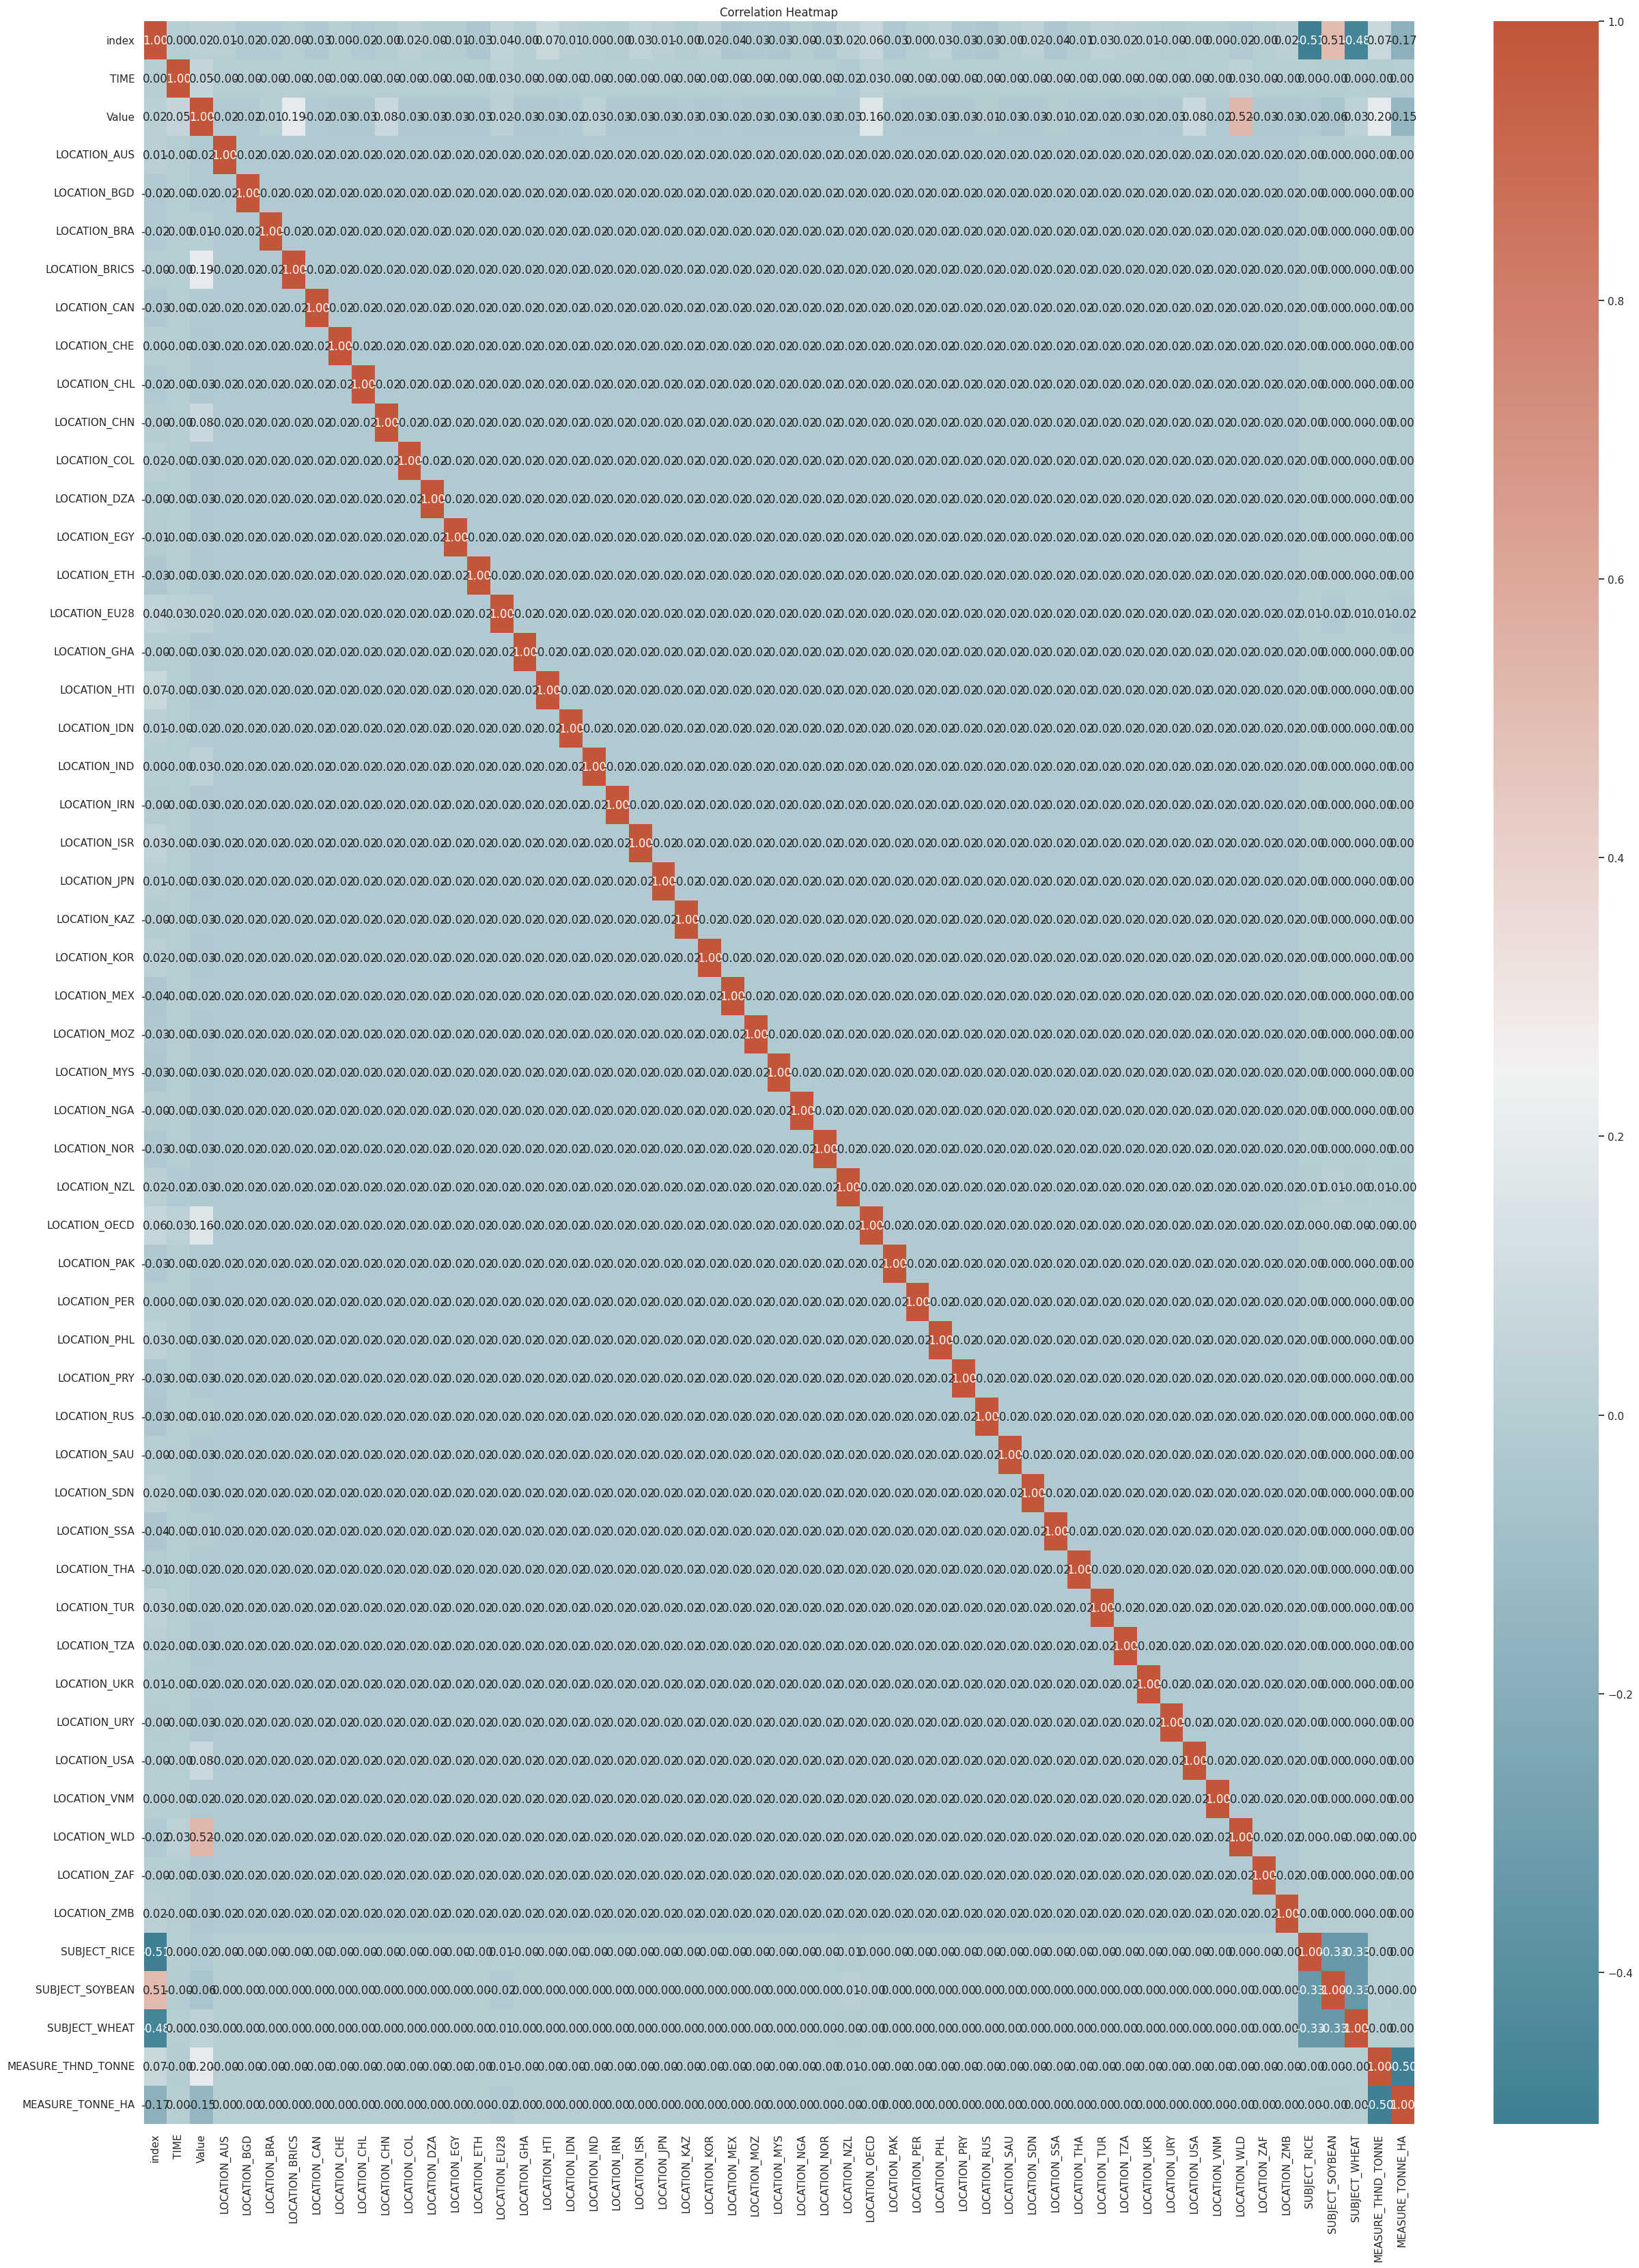

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a custom color palette
color_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(30, 40))
sns.heatmap(correlation_matrix, cmap=color_palette, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

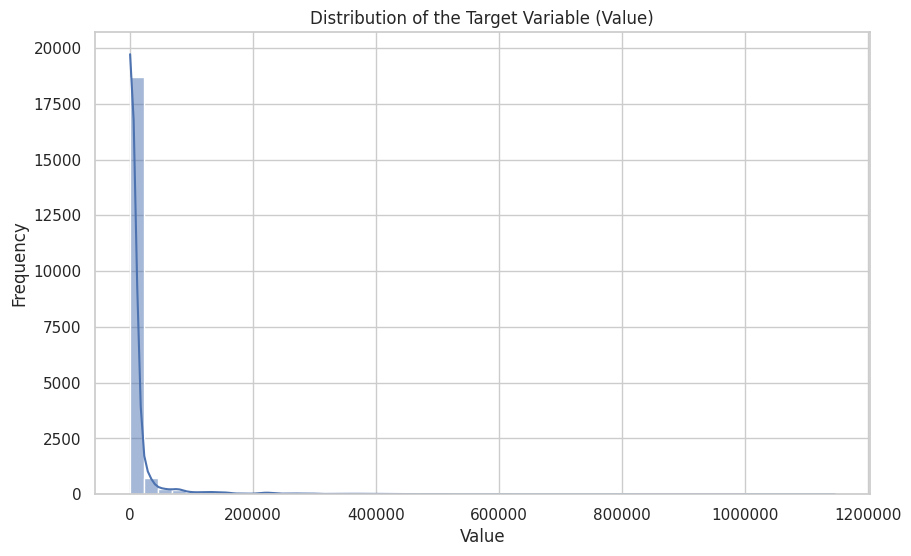

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=50, kde=True)
plt.title('Distribution of the Target Variable (Value)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Step 5: Model Building with PyCaret
AutoML tools simplify the process of model selection, hyperparameter tuning, and evaluation. One of the popular libraries for AutoML is PyCaret, which is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is extremely efficient for prototyping and makes it easy to compare, train, evaluate, tune, and deploy machine learning models with minimal code.

In [16]:
import pandas as pd

# Load the original data
data = pd.read_csv(file_path)  # Adjust path if needed

# We'll assume 'Value' is the target. We drop rows with missing target values.
data = data.dropna(subset=['Value'])

# Randomly sample 20% of your data without replacement to create a test set.
test_data = data.sample(frac=0.2, replace=False, random_state=1)

# To ensure no overlap, you might drop the test data from the original dataset, leaving the training data.
train_data = data.drop(test_data.index)

# Now, you have a randomized test dataset and your remaining training data.


In [17]:
train_data.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
5,5,AUS,CROPYIELD,RICE,TONNE_HA,A,1995,7.051095,NaN


In [18]:
from pycaret.regression import *

# 'Value' is our target. This function also initiates some preprocessing.
exp_reg101 = setup(data = train_data, target = 'Value', use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,5684
1,Target,Value
2,Target type,Regression
3,Original data shape,"(16453, 9)"
4,Transformed data shape,"(16453, 13)"
5,Transformed train set shape,"(11517, 13)"
6,Transformed test set shape,"(4936, 13)"
7,Numeric features,3
8,Categorical features,5
9,Rows with missing values,100.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [19]:
# This function compares all models and prints the performance metrics.
best = compare_models(fold=5)

# If you want to proceed with a specific model (e.g., Random Forest), you can use:
# model = create_model('rf')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,526.8777,10494881.0693,3228.6622,0.9970,0.5174,1986.8698,0.5500
rf,Random Forest Regressor,606.2487,11768126.6288,3410.5132,0.9966,0.6014,2379.0460,0.7180
xgboost,Extreme Gradient Boosting,1011.8429,14271234.1000,3738.5612,0.9958,2.9315,27577.5637,0.6060
knn,K Neighbors Regressor,683.4066,16918475.0000,4104.6448,0.9951,0.3454,898.2356,0.2120
dt,Decision Tree Regressor,691.5901,18000946.6530,4226.3952,0.9948,0.2990,993.4542,0.2080
lightgbm,Light Gradient Boosting Machine,2020.6263,42116670.1916,6476.4303,0.9878,3.2718,53688.6040,0.3560
gbr,Gradient Boosting Regressor,4747.6024,146262856.4808,12038.8102,0.9577,4.3963,273426.7566,0.8840
ada,AdaBoost Regressor,19466.3778,860463408.5289,29223.6572,0.7472,6.2034,2208747.1152,0.5300
ridge,Ridge Regression,18553.7232,2032715241.5335,44990.1549,0.4133,6.0612,2015009.3199,0.2180
llar,Lasso Least Angle Regression,18554.3642,2032715851.6410,44990.1641,0.4133,6.0612,2015483.8148,0.2220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

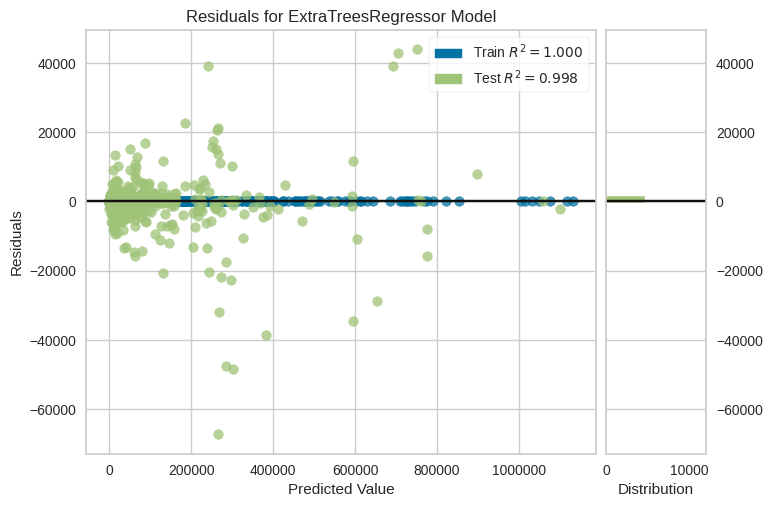

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,439.1507,8175645.9925,2859.3087,0.9980,0.3840,441.5626


In [20]:
# Examples include 'residuals', 'error', 'cooks', etc.
plot_model(best, plot = 'residuals')
# You can also evaluate the model with the test data
predictions = predict_model(best, data=test_data)


In [21]:
final_model = finalize_model(best)

# Saving the model
save_model(final_model, model_name = 'final_model_v1')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['index', 'TIME', 'Flag Codes'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['LOCATION', 'INDICATOR', 'SUBJECT',
                                              'MEASURE', 'FREQUENCY'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper...
                                                                     'MEASURE',
                                                                     'FREQUENCY'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper

## Conclusion
In this analytical endeavor, we embarked on a multi-stage process to harness machine learning in understanding and predicting patterns within a dataset related to crop production. The journey unfolded as follows:

1. Data Understanding and Exploration:
We began by importing the necessary dataset, ensuring it was properly loaded into our environment for manipulation and analysis. This step was crucial as it laid the groundwork for all subsequent actions.
An exploratory data analysis (EDA) followed, utilizing automated tools like Sweetviz to generate a detailed report. This EDA illuminated various statistical summaries and visual distributions, highlighting important variables, missing values, and the potential relationships within the data.

2. Data Preprocessing:
With insights from the EDA, we proceeded to cleanse the data by handling missing values and irrelevant columns, ensuring the data's quality and integrity.
The categorical variables were transformed via encoding techniques, making them suitable for machine learning algorithms.

3. Feature Engineering and Data Visualization:
* We explored advanced feature engineering to enhance the dataset further, considering the creation of interaction features and more sophisticated representations of the data to improve model learning.
* Visual representations of the data were generated, particularly through heatmaps, to provide an intuitive grasp of the feature correlations and distributions.

4. Model Building with AutoML:
* Utilizing the power of AutoML through PyCaret, we streamlined the model building process. This phase involved comparing various machine learning models based on performance metrics and selecting the most suitable model for our specific dataset and prediction task.
* The chosen model was further refined and evaluated, ensuring it met the standards and expectations for predictive accuracy and reliability.

5. Model Evaluation and Prediction:
* Critical to validating our model's efficacy, we conducted rigorous evaluations using a randomized testing dataset. This dataset, representative of "unseen" data, was pivotal in assessing how well our model generalized beyond the training data.
* Final steps included making predictions on the test data, providing a practical demonstration of the model's real-world applicability and effectiveness.

6. Finalization and Future Considerations:
* Concluding the project, we encapsulated our machine learning model, preserving it for future use and potential deployment. This finalization marks only the beginning of its utility, as the model now stands ready for new data and further challenges.
* Reflecting on the process, we recognize the importance of continual iteration and improvement. Future directions might include more nuanced feature engineering, exploration of different machine learning algorithms, and adaptation to new, larger, or more complex datasets.

Through these methodical steps, we harnessed sophisticated tools and methodologies within the realm of data science and machine learning. This project underscored the importance of each stage within the data pipeline, from initial understanding through to informed action. It stands as a testament to the power of machine learning in deriving meaningful insights and making informed predictions, driving forward the decision-making capabilities in the agricultural domain and beyond.

